<center>
<b><font size=6>Industry 4.0 의 중심, BigData</font></b>
</center>

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# 공공데이터 활용

## Case4. 한국노인인력개발원 노인일자리사업 참여노인 실태조사
https://www.data.go.kr/dataset/3073666/fileData.do

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sns

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]

### Step1. 데이터 준비
> DATA : 공공데이터의 인천 중구 커피숍 파일
> - Link : https://www.data.go.kr/data/15086876/fileData.do



In [2]:
%ls data\*.csv

 F 드라이브의 볼륨: Samsung_T5
 볼륨 일련 번호: 844F-BA7F

 F:\project\itech_lab\_jbfg-ds22\ds22-ipynb\s50-data-analysis\data 디렉터리

2022-06-06  오전 02:28             7,669 incheon_coffeeshop_20210805.csv
2018-05-05  오전 11:42           323,856 kaggle_bike_test.csv
2018-05-05  오전 11:42           648,353 kaggle_bike_train.csv
2019-05-03  오전 02:54            28,629 kaggle_titanic_test.csv
2019-05-03  오전 02:54            61,194 kaggle_titanic_train.csv
2019-09-02  오전 12:06            11,830 public_crime_stat_2015.csv
2019-09-02  오전 12:04            11,758 public_crime_stat_2016.csv
2020-12-17  오전 12:27            11,623 public_crime_stat_2020.csv
2019-05-03  오전 02:54           166,784 public_old_buildings_20170404.csv
2019-05-03  오전 02:54           178,284 public_old_buildings_20171016.csv
2019-05-03  오전 02:54           221,073 public_old_man_job_code_2016.csv
2019-05-03  오전 02:54         2,320,918 public_old_man_job_data_2016.csv
2019-05-03  오전 02:54               523 public_seoul_cctv_2020.csv
2019-05-

### Step2. 데이터 확인

In [9]:
# csv파일 불러오기
# df = pd.read_csv('./data/incheon_coffeeshop_20210805.csv', encoding='utf-8')  # utf-8, euc-kr, cp949
df = pd.read_csv('./data/incheon_coffeeshop_20210805.csv', encoding='euc-kr')
df.head()

,연번,사업장명,소재지지번주소,소재지도로명주소,데이터기준일자
0,1,Cafe Arancia,인천광역시 중구 내동 212-22 1층,인천광역시 중구 우현로49번길 10-5 1층,2021-08-05
1,2,디저트카페 아네모오네,인천광역시 중구 송학동3가 7-26,인천광역시 중구 신포로35번길 10-1,2021-08-05
2,3,관동오리진,인천광역시 중구 관동1가 14-3,인천광역시 중구 신포로27번길 96,2021-08-05
3,4,카페맑음,인천광역시 중구 신포동 48-3,인천광역시 중구 신포로 32-21,2021-08-05
4,5,팟알,인천광역시 중구 관동1가 17,인천광역시 중구 신포로27번길 96-2,2021-08-05


### Step3. 필요한 주소만 남겨놓기

In [11]:
address = df['소재지지번주소']
len(address)

80

In [12]:
# 주소 데이터 깔끔하게 다듬기
for i in range(len(address)):
    a = address[i].split(' ')
    address[i] = " ".join(a[0:4])
print(address)

0      인천광역시 중구 내동 212-22
1     인천광역시 중구 송학동3가 7-26
2      인천광역시 중구 관동1가 14-3
3       인천광역시 중구 신포동 48-3
4        인천광역시 중구 관동1가 17
             ...         
75     인천광역시 중구 신포동 12-62
76     인천광역시 중구 신포동 12-52
77     인천광역시 중구 관동2가 10-9
78        인천광역시 중구 내동 166
79      인천광역시 중구 사동 23-13
Name: 소재지지번주소, Length: 80, dtype: object


C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_22684/1852909931.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address[i] = " ".join(a[0:4])


In [29]:
address2 = df['소재지도로명주소']
len(address2)

80

### Step4. 위경도 변환하기
> 
> - geopy 라이브러리를 import 
> - 도로명주소 위도 경도 값으로 바꿔주기 

In [16]:
from geopy.geocoders import Nominatim

In [18]:
# 도로명주소 위도 경도 값으로 바꿔주기 
geo_local = Nominatim(user_agent='South Korea')

In [79]:
# 위도, 경도 반환하는 함수
def geocoding(address):
    '''
    geocoding함수 안에 주소를 넣어주면 그 주소에 맞는 위도, 경도를
    리스트로 만들어 [위도, 경도]로 반환
    '''
    geo = geo_local.geocode(address)
    # print('{} : {}'.format(address, geo))
    
    # x_y = [geo.latitude, geo.longitude]
    x_y = [geo.latitude, geo.longitude] if geo else [None, None]
    
    
    return x_y

In [59]:
addr = address[0]
addr

'인천광역시 중구 내동 212-22'

In [60]:
geo = geo_local.geocode(addr)
geo

Location(내동, 중구, 인천, 대한민국, (37.47342, 126.62744, 0.0))

In [62]:
geocoding(addr)

[37.47342, 126.62744]

In [71]:
addr2 = address2[0]
addr2

'인천광역시 중구 우현로49번길 10-5 1층'

In [72]:
geocoding(addr2)

[None, None]

In [74]:
# 주소를 위,경도 값으로 변환하기 
latitude = []
longitude =[]

for addr in address2:
    geo_loc = geocoding(addr)
    print("{} : {}".format(addr, geo_loc)
    latitude.append(geo_loc[0])
    longitude.append(geo_loc[1])

SyntaxError: invalid syntax (CreatorTemp/ipykernel_22684/3092028953.py, line 8)

In [97]:
# 주소를 위,경도 값으로 변환하기 
latitude = []
longitude =[]

for idx in df.index:
    addr = df['소재지지번주소'][idx]
    geo_loc = geocoding(addr)
    
    if geo_loc[0]:
        print('지번', end='\t')
    else:
        print('도로명', end='\t')
        addr = df['소재지도로명주소'][idx]
        geo_loc = geocoding(addr)
    
    print("{}.{} : {}".format(idx, addr, geo_loc))

    latitude.append(geo_loc[0])
    longitude.append(geo_loc[1])

지번	0.인천광역시 중구 내동 212-22 : [37.47342, 126.62744]
도로명	1.인천광역시 중구 신포로35번길 10-1 : [37.4733945, 126.6231442]
지번	2.인천광역시 중구 관동1가 14-3 : [37.47372, 126.62158]
지번	3.인천광역시 중구 신포동 48-3 : [37.47117, 126.6267]
지번	4.인천광역시 중구 관동1가 17 : [37.47372, 126.62158]
지번	5.인천광역시 중구 송학동1가 5-1 : [37.46486965, 126.63235731670963]
지번	6.인천광역시 중구 북성동3가 4-11 : [37.477148, 126.629364]
지번	7.인천광역시 중구 북성동2가 9-69 : [37.4772081, 126.61822270723718]
지번	8.인천광역시 중구 선린동 12 : [37.4745292, 126.61875327233722]
도로명	9.인천광역시 중구 신포로35번길 22-1 1층 : [None, None]
도로명	10.인천광역시 중구 제물량로166번길 1-6 머치스커피 : [None, None]
지번	11.인천광역시 중구 관동3가 4-27 : [37.472, 126.6246]
지번	12.인천광역시 중구 중앙동2가 23 : [37.47283375, 126.62172163931905]
도로명	13.인천광역시 중구 신포로39번길 23 : [37.4737536, 126.6234524]
지번	14.인천광역시 중구 관동2가 10-1 : [37.47275, 126.62338]
지번	15.인천광역시 중구 중앙동4가 8-4 : [37.4713287, 126.62409354016961]
지번	16.인천광역시 중구 송학동3가 4-28 : [37.4634659, 126.63441222050349]
지번	17.인천광역시 중구 중앙동1가 10-4 : [37.4734803, 126.62044402970957]
지번	18.인천광역시 중구 내동 152 : [37.47342, 126.6

In [121]:
addr = '인천광역시 중구 제물량로166번길 1-6 머치스커피'
addr

'인천광역시 중구 제물량로166번길 1-6 머치스커피'

In [122]:
geocoding(addr)

[None, None]

In [123]:
tmp = addr.split()
tmp

['인천광역시', '중구', '제물량로166번길', '1-6', '머치스커피']

In [116]:
' '.join(tmp[:-1])

'인천광역시 중구 제물량로166번길 1-6'

In [117]:
addr = ' '.join(tmp[:-1])
addr

'인천광역시 중구 제물량로166번길 1-6'

In [124]:
addr = ' '.join(addr.split()[:-1])
addr

'인천광역시 중구 제물량로166번길 1-6'

In [125]:
geocoding(addr)

[37.4708742, 126.6249162]

In [128]:
# 주소를 위,경도 값으로 변환하기 
latitude = []
longitude =[]

for idx in df.index:
    addr = df['소재지지번주소'][idx]
    geo_loc = geocoding(addr)
    
    if geo_loc[0]:
        print('지번', end='\t')
    else:
        print('도로명', end='\t')
        addr = df['소재지도로명주소'][idx]
        geo_loc = geocoding(addr)
        
    if not geo_loc[0]:
        print('주소만', end='\t')
        addr = ' '.join(addr.split()[:-1])
        geo_loc = geocoding(addr)
    
    # print("{}.{} : {}".format(idx, addr, geo_loc))
    print("{}.{} : {}".format(idx, geo_loc, addr))

    latitude.append(geo_loc[0])
    longitude.append(geo_loc[1])

지번	0.[37.47342, 126.62744] : 인천광역시 중구 내동 212-22
도로명	1.[37.4733945, 126.6231442] : 인천광역시 중구 신포로35번길 10-1
지번	2.[37.47372, 126.62158] : 인천광역시 중구 관동1가 14-3
지번	3.[37.47117, 126.6267] : 인천광역시 중구 신포동 48-3
지번	4.[37.47372, 126.62158] : 인천광역시 중구 관동1가 17
지번	5.[37.46486965, 126.63235731670963] : 인천광역시 중구 송학동1가 5-1
지번	6.[37.477148, 126.629364] : 인천광역시 중구 북성동3가 4-11
지번	7.[37.4772081, 126.61822270723718] : 인천광역시 중구 북성동2가 9-69
지번	8.[37.4745292, 126.61875327233722] : 인천광역시 중구 선린동 12
도로명	주소만	9.[37.4733945, 126.6231442] : 인천광역시 중구 신포로35번길 22-1
도로명	주소만	10.[37.4708742, 126.6249162] : 인천광역시 중구 제물량로166번길 1-6
지번	11.[37.472, 126.6246] : 인천광역시 중구 관동3가 4-27
지번	12.[37.47283375, 126.62172163931905] : 인천광역시 중구 중앙동2가 23
도로명	13.[37.4737536, 126.6234524] : 인천광역시 중구 신포로39번길 23
지번	14.[37.47275, 126.62338] : 인천광역시 중구 관동2가 10-1
지번	15.[37.4713287, 126.62409354016961] : 인천광역시 중구 중앙동4가 8-4
지번	16.[37.4634659, 126.63441222050349] : 인천광역시 중구 송학동3가 4-28
지번	17.[37.4734803, 126.62044402970957] : 인천광역시 중구 중앙동1가 10-4
지번	18.[37.47342

In [130]:
addr = df['소재지지번주소'][49]
addr

'인천광역시 중구 송학동3가 7-9'

In [131]:
geocoding(addr)

[None, None]

In [132]:
addr = ' '.join(addr.split()[:-1])
addr

'인천광역시 중구 송학동3가'

In [133]:
geocoding(addr)

[37.473130350000005, 126.6257094321324]

In [134]:
addr = df['소재지도로명주소'][49]
addr

'인천광역시 중구 신포로39번길 23 1층 느호'

In [135]:
geocoding(addr)

[None, None]

In [136]:
addr = ' '.join(addr.split()[:-1])
addr

'인천광역시 중구 신포로39번길 23 1층'

In [137]:
geocoding(addr)

[None, None]

In [138]:
addr = ' '.join(addr.split()[:-1])
addr

'인천광역시 중구 신포로39번길 23'

In [139]:
geocoding(addr)

[37.4737536, 126.6234524]

In [140]:
# 주소를 위,경도 값으로 변환하기 
latitude = []
longitude =[]

for idx in df.index:
    addr = df['소재지도로명주소'][idx]
    geo_loc = geocoding(addr)
    
    lati = geo_

    if not geo_loc[0]:
        print('축약1', end='\t')
        addr = ' '.join(addr.split()[:-1])
        geo_loc = geocoding(addr)

    if not geo_loc[0]:
        print('축약2', end='\t')
        addr = ' '.join(addr.split()[:-1])
        geo_loc = geocoding(addr)

        
    # print("{}.{} : {}".format(idx, addr, geo_loc))
    print("{}.{} : {}".format(idx, geo_loc, addr))

    latitude.append(geo_loc[0])
    longitude.append(geo_loc[1])

축약1	0.[37.4716422, 126.6273599] : 인천광역시 중구 우현로49번길 10-5
1.[37.4733945, 126.6231442] : 인천광역시 중구 신포로35번길 10-1
2.[37.4727937, 126.6225932] : 인천광역시 중구 신포로27번길 96
3.[37.4709967, 126.6242367] : 인천광역시 중구 신포로 32-21
4.[37.4727937, 126.6225932] : 인천광역시 중구 신포로27번길 96-2
5.[37.4733945, 126.6231442] : 인천광역시 중구 신포로35번길 64
축약1	6.[37.4769354, 126.6214376] : 인천광역시 중구 자유공원서로 21
7.[37.4759065, 126.6180057] : 인천광역시 중구 차이나타운로44번길 16-24
축약1	8.[37.4741327, 126.6188194] : 인천광역시 중구 차이나타운로59번길 16
축약1	9.[37.4733945, 126.6231442] : 인천광역시 중구 신포로35번길 22-1
축약1	10.[37.4708742, 126.6249162] : 인천광역시 중구 제물량로166번길 1-6
축약1	11.[37.4733945, 126.6231442] : 인천광역시 중구 신포로35번길 17
12.[37.47283375, 126.62172163931905] : 인천광역시 중구 중앙동2가 23
13.[37.4737536, 126.6234524] : 인천광역시 중구 신포로39번길 23
축약1	14.[37.472425, 126.6241378] : 인천광역시 중구 신포로31번길 47
15.[37.4725047, 126.6223375] : 인천광역시 중구 신포로23번길 23
축약1	16.[37.4742081, 126.6257439] : 인천광역시 중구 송학로 24-5
17.[37.4725047, 126.6223375] : 인천광역시 중구 신포로23번길 90
18.[37.4723704, 126.627203] : 인천광역시 중구 

In [110]:
df.head()

,연번,사업장명,소재지지번주소,소재지도로명주소,데이터기준일자
0,1,Cafe Arancia,인천광역시 중구 내동 212-22,인천광역시 중구 우현로49번길 10-5 1층,2021-08-05
1,2,디저트카페 아네모오네,인천광역시 중구 송학동3가 7-26,인천광역시 중구 신포로35번길 10-1,2021-08-05
2,3,관동오리진,인천광역시 중구 관동1가 14-3,인천광역시 중구 신포로27번길 96,2021-08-05
3,4,카페맑음,인천광역시 중구 신포동 48-3,인천광역시 중구 신포로 32-21,2021-08-05
4,5,팟알,인천광역시 중구 관동1가 17,인천광역시 중구 신포로27번길 96-2,2021-08-05


In [ ]:
file_name = './data/incheon_coffeeshop_20210805'

In [ ]:
#####Dataframe만들기######
address_df = pd.DataFrame({'카페이름': csv['사업장명'],'상세주소':csv['소재지도로명주소'],'주소':address,'위도':latitude,'경도':longitude})

#df저장
address_df.to_csv('jungu_incheon_coffeeshop.csv')

In [2]:
df_code = pd.read_csv('data/public_old_man_job_code_2016.csv', encoding='EUC-KR')
len(df_code)

3082

In [3]:
df_code.head()

,번호,항목,값,라벨
0,SQ1_1,지역,1,서울
1,SQ1_1,지역,2,부산
2,SQ1_1,지역,3,대구
3,SQ1_1,지역,4,인천
4,SQ1_1,지역,5,광주


In [4]:
df_code.tail()

,번호,항목,값,라벨
3077,H7_3순위,지속 참여하면서 초기 사업에 비해 어려워진 점(3순위),9,업무 수행 시 참조 할 수 있는 자세한 안내 자료(매뉴얼) 부족
3078,H7_3순위,지속 참여하면서 초기 사업에 비해 어려워진 점(3순위),10,직무관련 교육 부족
3079,H7_3순위,지속 참여하면서 초기 사업에 비해 어려워진 점(3순위),11,없음
3080,H7_3순위,지속 참여하면서 초기 사업에 비해 어려워진 점(3순위),12,기타
3081,H7_3순위,지속 참여하면서 초기 사업에 비해 어려워진 점(3순위),99,모름/ 무응답


In [5]:
df_code['항목'].unique()

array(['지역', '거주하는 시군구 유형', '거주하는 읍면동 유형', '성별', '연령',
       '2017년 사업 및 구직 신청 월(달)', '2018년 사업 및 구직 신청 월(달)',
       '2019년 사업 및 구직 신청 월(달)', '2020년 사업 및 구직 신청 월(달)',
       '2021년 사업 및 구직 신청 월(달)', '2022년 사업 및 구직 신청 월(달)', '수행기관 및 유형',
       '참여사업 및 유형', '노인 일자리 및 사회활동 지원사업 활동 내용',
       '노인 일자리 및 사회활동 지원사업 최초 참여 여부', '노인 일자리 및 사회활동 지원사업에 처음 참여한 년도',
       '사업단 및 사업 유형 변경 경험', '사업단 및 사업 유형 변경 이유', '전년도 동일 사업단 및 근무처 활동 여부',
       '노인 일자리 및 사회활동 지원사업 인지 경로', '노인 일자리 및 사회활동 지원사업 참여 동기(2순위)',
       '노인 일자리 및 사회활동 지원사업 참여 동기(3순위)', '노인 일자리 및 사회활동 지원사업 참여 동기(4순위)',
       '노인 일자리 및 사회활동 지원사업 참여 동기(5순위)', '노인 일자리 및 사회활동 지원사업 참여 동기(6순위)',
       '노인 일자리 및 사회활동 지원사업 참여 동기(7순위)', '노인 일자리 및 사회활동 지원사업 참여 동기(8순위)',
       '노인 일자리 및 사회활동 지원사업 참여 동기(9순위)', '노인 일자리 및 사회활동 지원사업 참여 동기(10순위)',
       '노인 일자리 및 사회활동 지원사업_1) 주당 활동(근무) 시간',
       '노인 일자리 및 사회활동 지원사업_2) 주당 활동(근무) 일수 유형',
       '노인 일자리 및 사회활동 지원사업_2) 주당 활동(근무) 일수',
       '노인 일자리 및 사회활동 지원사업_3) 활동(근무) 일', '노인 일자리 및 사회활동 지원사업_4) 교대제 

In [6]:
key_word = '노인 일자리 및 사회활동 지원사업 참여 동기' 
key_word.find('참여 동기')

19

In [7]:
df_code['검색결과'] = ""

for idx in np.arange(len(df_code)):
    # result = df_code['항목'].values[idx].find(key_word)
    result = key_word in df_code['항목'].values[idx]
    df_code['검색결과'].values[idx] = result
    

In [8]:
df_code.head()

,번호,항목,값,라벨,검색결과
0,SQ1_1,지역,1,서울,False
1,SQ1_1,지역,2,부산,False
2,SQ1_1,지역,3,대구,False
3,SQ1_1,지역,4,인천,False
4,SQ1_1,지역,5,광주,False


In [9]:
df_code['검색결과'][110:120]

110    False
111    False
112    False
113    False
114    False
115    False
116    False
117    False
118     True
119     True
Name: 검색결과, dtype: object

In [10]:
df_code[:][df_code['검색결과']==True]

,번호,항목,값,라벨,검색결과
118,A4_1순위,노인 일자리 및 사회활동 지원사업 참여 동기(2순위),1,생계비 마련,True
119,A4_1순위,노인 일자리 및 사회활동 지원사업 참여 동기(3순위),2,용돈 마련,True
120,A4_1순위,노인 일자리 및 사회활동 지원사업 참여 동기(4순위),3,사회참여 및 관계 형성의 수단,True
121,A4_1순위,노인 일자리 및 사회활동 지원사업 참여 동기(5순위),4,건강 유지의 수단,True
122,A4_1순위,노인 일자리 및 사회활동 지원사업 참여 동기(6순위),5,자아실현 및 자기발전 수단,True
123,A4_1순위,노인 일자리 및 사회활동 지원사업 참여 동기(7순위),6,여가시간 활용 수단,True
124,A4_1순위,노인 일자리 및 사회활동 지원사업 참여 동기(8순위),7,일을 통한 즐거움,True
125,A4_1순위,노인 일자리 및 사회활동 지원사업 참여 동기(9순위),8,기타,True
126,A4_1순위,노인 일자리 및 사회활동 지원사업 참여 동기(10순위),99,모름/ 무응답,True
127,A4_2순위,노인 일자리 및 사회활동 지원사업 참여 동기(2순위),1,생계비 마련,True


In [11]:
key_word = '노인 일자리 및 사회활동 지원사업 참여 동기' 
df_code['검색결과'] = ""

for idx in np.arange(len(df_code)):
    # result = df_code['항목'].values[idx].find(key_word)
    result = key_word in df_code['항목'].values[idx]
    df_code['검색결과'].values[idx] = result
    
df_code[:][df_code['검색결과']==True]

,번호,항목,값,라벨,검색결과
118,A4_1순위,노인 일자리 및 사회활동 지원사업 참여 동기(2순위),1,생계비 마련,True
119,A4_1순위,노인 일자리 및 사회활동 지원사업 참여 동기(3순위),2,용돈 마련,True
120,A4_1순위,노인 일자리 및 사회활동 지원사업 참여 동기(4순위),3,사회참여 및 관계 형성의 수단,True
121,A4_1순위,노인 일자리 및 사회활동 지원사업 참여 동기(5순위),4,건강 유지의 수단,True
122,A4_1순위,노인 일자리 및 사회활동 지원사업 참여 동기(6순위),5,자아실현 및 자기발전 수단,True
123,A4_1순위,노인 일자리 및 사회활동 지원사업 참여 동기(7순위),6,여가시간 활용 수단,True
124,A4_1순위,노인 일자리 및 사회활동 지원사업 참여 동기(8순위),7,일을 통한 즐거움,True
125,A4_1순위,노인 일자리 및 사회활동 지원사업 참여 동기(9순위),8,기타,True
126,A4_1순위,노인 일자리 및 사회활동 지원사업 참여 동기(10순위),99,모름/ 무응답,True
127,A4_2순위,노인 일자리 및 사회활동 지원사업 참여 동기(2순위),1,생계비 마련,True


In [12]:
df = pd.read_csv('data/public_old_man_job_data_2016.csv')
len(df)

C:\Python\Anaconda3-50\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (75,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2500

In [13]:
df.head(10)

,ID,SQ1_1,SQ1_2,SQ1_3,SQ2,SQ3,SQ4,SQ5,SQ6,A1,...,H3_1순위,H3_2순위,H4_1순위,H4_2순위,H5_1순위,H5_2순위,H6,H7_1순위,H7_2순위,H7_3순위
0,4,9,1,3,1,80,2,4,3,34,...,4,1,4,3,1,2,5,11,,
1,24,9,2,1,2,79,3,7,3,31,...,1,4,4,3,2,3,4,1,2,4
2,56,9,1,1,1,74,2,8,3,34,...,1,4,1,2,4,3,2,1,6,
3,131,9,2,1,2,63,1,5,7,71,...,1,2,1,2,1,2,4,2,7,5
4,214,9,1,1,2,67,1,8,3,34,...,,,,,,,,,,
5,265,9,1,3,2,72,2,4,1,11,...,1,4,2,4,1,4,5,11,,
6,349,9,1,3,1,79,2,4,3,34,...,1,3,3,4,1,3,5,3,5,6
7,363,9,1,3,1,68,2,5,3,35,...,,,,,,,,,,
8,386,9,2,1,2,59,3,4,6,62,...,,,,,,,,,,
9,396,9,1,3,2,74,3,5,8,83,...,1,2,4,2,1,2,9,11,,


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Columns: 413 entries, ID to H7_3순위
dtypes: float64(5), int64(177), object(231)
memory usage: 7.9+ MB


In [15]:
df.set_index('ID', inplace=True)           
df.head(10)

,SQ1_1,SQ1_2,SQ1_3,SQ2,SQ3,SQ4,SQ5,SQ6,A1,A2,...,H3_1순위,H3_2순위,H4_1순위,H4_2순위,H5_1순위,H5_2순위,H6,H7_1순위,H7_2순위,H7_3순위
ID,,,,,,,,,,,,,,,,,,,,,
4,9,1,3,1,80,2,4,3,34,2,...,4,1,4,3,1,2,5,11,,
24,9,2,1,2,79,3,7,3,31,2,...,1,4,4,3,2,3,4,1,2,4
56,9,1,1,1,74,2,8,3,34,2,...,1,4,1,2,4,3,2,1,6,
131,9,2,1,2,63,1,5,7,71,2,...,1,2,1,2,1,2,4,2,7,5
214,9,1,1,2,67,1,8,3,34,1,...,,,,,,,,,,
265,9,1,3,2,72,2,4,1,11,2,...,1,4,2,4,1,4,5,11,,
349,9,1,3,1,79,2,4,3,34,2,...,1,3,3,4,1,3,5,3,5,6
363,9,1,3,1,68,2,5,3,35,1,...,,,,,,,,,,
386,9,2,1,2,59,3,4,6,62,1,...,,,,,,,,,,


In [16]:
column_name = 'A4_2순위'

df_result = df[column_name].value_counts()
df_result

2    1034
4     377
7     305
1     271
3     210
6     159
5      71
       68
8       5
Name: A4_2순위, dtype: int64

In [17]:
# df_result.index.names.r

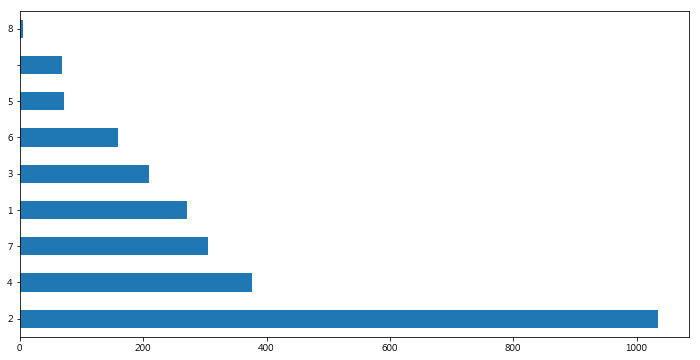

In [18]:
df_result.plot(kind='barh')


In [19]:
df_result.index

Index(['2', '4', '7', '1', '3', '6', '5', ' ', '8'], dtype='object')

In [20]:
df_item = df_code[:][df_code['번호']==column_name]
df_item

,번호,항목,값,라벨,검색결과
127,A4_2순위,노인 일자리 및 사회활동 지원사업 참여 동기(2순위),1,생계비 마련,True
128,A4_2순위,노인 일자리 및 사회활동 지원사업 참여 동기(2순위),2,용돈 마련,True
129,A4_2순위,노인 일자리 및 사회활동 지원사업 참여 동기(2순위),3,사회참여 및 관계 형성의 수단,True
130,A4_2순위,노인 일자리 및 사회활동 지원사업 참여 동기(2순위),4,건강 유지의 수단,True
131,A4_2순위,노인 일자리 및 사회활동 지원사업 참여 동기(2순위),5,자아실현 및 자기발전 수단,True
132,A4_2순위,노인 일자리 및 사회활동 지원사업 참여 동기(2순위),6,여가시간 활용 수단,True
133,A4_2순위,노인 일자리 및 사회활동 지원사업 참여 동기(2순위),7,일을 통한 즐거움,True
134,A4_2순위,노인 일자리 및 사회활동 지원사업 참여 동기(2순위),8,기타,True
135,A4_2순위,노인 일자리 및 사회활동 지원사업 참여 동기(2순위),99,모름/ 무응답,True


In [21]:
df_label = df_item['라벨'][df_item['값']==1]
df_label.values[0]

'생계비 마련'

In [24]:
% whos

Variable       Type         Data/Info
-------------------------------------
column_name    str          A4_2순위
df             DataFrame            SQ1_1  SQ1_2  SQ1<...>[2500 rows x 412 columns]
df_code        DataFrame              번호             <...>\n[3082 rows x 5 columns]
df_item        DataFrame             번호              <...>9           모름/ 무응답  True
df_label       Series       127    생계비 마련\nName: 라벨, dtype: object
df_result      Series       2    1034\n4     377\n7  <...>ame: A4_2순위, dtype: int64
font_manager   module       <module 'matplotlib.font_<...>lotlib\\font_manager.py'>
font_name      str          Malgun Gothic
idx            int32        3081
key_word       str          노인 일자리 및 사회활동 지원사업 참여 동기
np             module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd             module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt            module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
rc             functio

In [25]:
# DataFrame 객체 생성2
frame2 = pd.DataFrame(df, columns=['year', 'state', 'pop', 'debt'],
                   index=['one', 'two', 'three', 'four', 'five'])
frame2

,year,state,pop,debt
one,NaN,NaN,NaN,NaN
two,NaN,NaN,NaN,NaN
three,NaN,NaN,NaN,NaN
four,NaN,NaN,NaN,NaN
five,NaN,NaN,NaN,NaN


#### <font color='blue'> # 준공일자 기준으로 정렬 </font>

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>